<a href="https://colab.research.google.com/github/CPallaresU/TALLERES-CEIA/blob/main/SEMANA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [704]:
import numpy as np
from sklearn.decomposition import PCA

##EJERCICIO #1

In [705]:
filas=4 #R_n,d, filas siendo cada observacion y columnas el total de dimensiones
columnas=5
componentes=2
data=np.array([[0.8,0.7],[1,-15]])#np.random.rand(filas,columnas)
mu=np.mean(data,axis=0)
std = np.std(data,axis=0)
data=(data-mu)/std
data = data.reshape(2,2)#data.reshape(filas, columnas)


In [706]:
cov_data=np.cov(data.T)

In [707]:
values,vectors=np.linalg.eig(cov_data)
idx=np.argsort(values)[::-1]
values=values[idx]
vectors=vectors[idx]
componentes_t=vectors[0:componentes]

In [708]:
values

array([4.0000000e+00, 4.4408921e-16])

In [709]:
t=np.dot(data,componentes_t.T)

##Scikitlearn PCA

In [710]:
pca = PCA(n_components=2)
pca.fit_transform(data);

##Verificando que PCA de scikitlearn arroje los mismos resultados de PCA de Numpy

In [711]:
if np.allclose(pca.components_,componentes_t.T):
  print("Resultados iguales para ambas implementaciones")

Resultados iguales para ambas implementaciones


##EJERCICIO #2

In [712]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import os
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 
from sklearn.datasets import load_digits
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [713]:
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


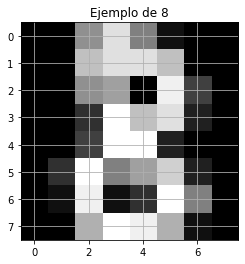

In [714]:
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

In [715]:
mu=np.mean(X,axis=0)
std = np.std(X,axis=0)
X=(X-mu)/std
X=np.nan_to_num(X)

pca = PCA(n_components=64)
pca.fit_transform(X);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

invalid value encountered in true_divide



##El total de componentes que explican el 90% de los 64 atributos de cada imagen son 46, explicando el 90.58%

In [716]:
v=pca.singular_values_
l=[]
sw=True
for i in range(0,64):
  value=sum(v[0:i])/sum(v)
  l.append(value)
  if value > .9 and sw:
    sw=False
    print("Son suficiente {} componentes para explicar los 64 atributos".format(i))

Son suficiente 46 componentes para explicar los 64 atributos


Text(0, 0.5, 'VARIANCE EXPLAINED')

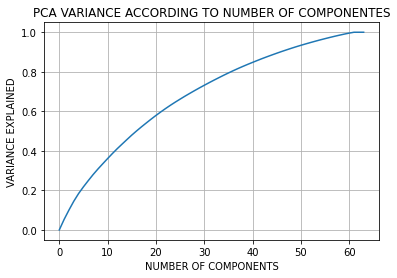

In [717]:
plt.plot(l)
plt.grid()
plt.title("PCA VARIANCE ACCORDING TO NUMBER OF COMPONENTES")
plt.xlabel("NUMBER OF COMPONENTS")
plt.ylabel("VARIANCE EXPLAINED")

In [718]:
pca = PCA(n_components=46)
new_img_pca=pca.fit_transform(X)

Text(0.5, 1.0, 'NO-PCA')

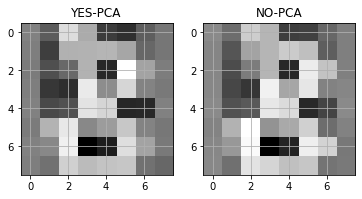

In [719]:
plt.subplot(1, 2, 1)
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
projection=pca.inverse_transform(new_img_pca)
plt.imshow(projection[8, :].reshape((8, 8)), cmap='gray')
plt.title("YES-PCA")

plt.subplot(1, 2, 2)
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')
plt.title("NO-PCA")

In [720]:
corr_m=np.corrcoef(new_img_pca.T)

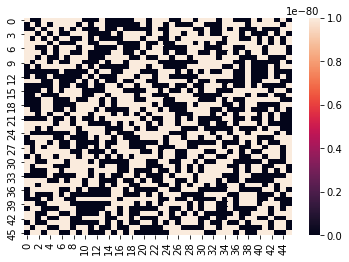

In [721]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_m,vmin=0, vmax=0.00000000000000000000000000000000000000000000000000000000000000000000000000000001)

In [722]:
import plotly.express as px

n=2
pca = PCA(n_components=n)
new_img_pca=pca.fit_transform(X)

columna=[i for i in range(0,n)]
df=pd.DataFrame(new_img_pca,columns=columna)
df['Number'] = y.tolist()
df["Number"] = df["Number"].astype(str)

fig = px.scatter(df, x=0, y=1, color=df['Number'])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



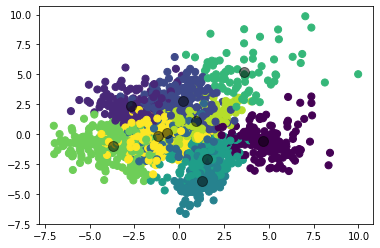

In [723]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=10)
y=kmeans.fit_predict(df)

plt.scatter(df[0], df[1], c=y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

In [724]:
n=3
pca = PCA(n_components=n)
new_img_pca=pca.fit_transform(X)

columna=[i for i in range(0,n)]
df_=pd.DataFrame(new_img_pca,columns=columna)
df_['Number'] = y.tolist()
df_["Number"] = df_["Number"].astype(str)

fig = px.scatter_3d(df_, x=0, y=1,z=2, color=df_['Number'])
fig.show()

In [725]:
from sklearn.cluster import KMeans

n=2
pca = PCA(n_components=n)
new_img_pca=pca.fit_transform(X)

columna=[i for i in range(0,n)]
df=pd.DataFrame(new_img_pca,columns=columna)
kmeans = KMeans(n_clusters=10)
y_=kmeans.fit_predict(df)

df["Number"]=y_
df["Number"] = df["Number"].astype(str)
df_kmean=df

fig = px.scatter(df, x=0, y=1, color=df['Number'])
fig.show()

##Tenemos datos mas agrupados pero realmente quedaron cada cluster comparte muchos puntos que realmente no son iguales (iguales al número que corresponden), la siguiente celda lo verifica al observar un accuracy muy bajo.

In [726]:
from sklearn.metrics import accuracy_score
print("Accuracy o rendimiento del KMeans: {}".format(accuracy_score(y, y_)))

Accuracy o rendimiento del KMeans: 0.07122982749026155


##El K optimo está cerca al 10, pero empieza a tomar el valor optimo cerca al 13, a razón de estos obtenemos el resultado anterior, un accuracy muy bajo.

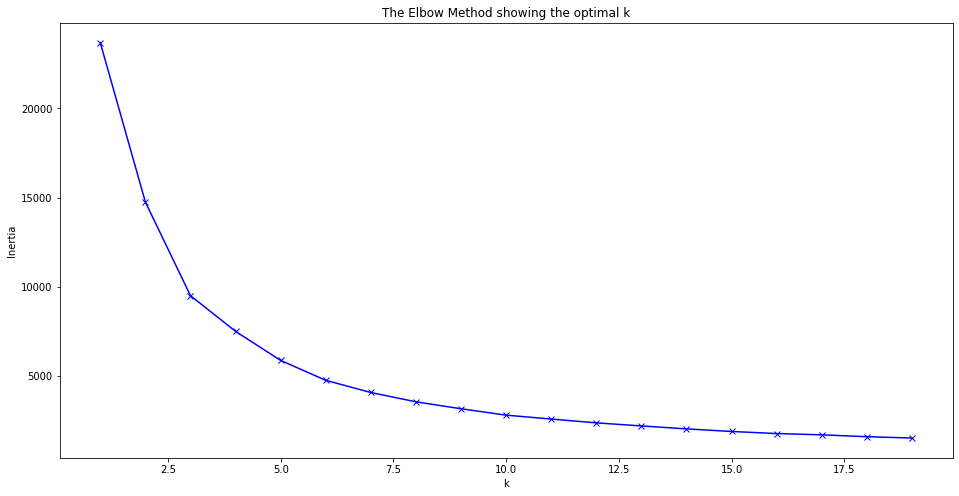

In [727]:
n=2
pca = PCA(n_components=n)
new_img_pca=pca.fit_transform(X)

columna=[i for i in range(0,n)]
df=pd.DataFrame(new_img_pca,columns=columna)

inertia = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##Generaremos artificialmente el número "0" teniendo en cuenta el máximo y mínimo de cada componente (PC_1 y PC_2)

In [728]:
from sklearn.utils import shuffle
n_recreate=5

In [729]:
df_0=df_kmean.loc[df_kmean['Number'] ==str(n_recreate)]

max_pc1=df_0[0].max()
min_pc1=df_0[0].min()

max_pc2=df_0[1].max()
min_pc2=df_0[1].min()

pc_1=np.arange(min_pc1, max_pc1, 0.01, dtype=float)
pc_2=np.arange(min_pc2, max_pc2, 0.01, dtype=float)

pc_1=(list(shuffle(pc_1,random_state=0)))[0:len(df_0)]
pc_2=(list(shuffle(pc_2,random_state=0)))[0:len(df_0)]
number=[n_recreate]*len(df_0)

In [730]:
df_original=df_kmean.loc[df_kmean['Number'] !=str(n_recreate)]
df_original=df_original.reset_index()

index=np.arange(len(df_original),len(df_original)+len(number),1)

df_artificial = pd.DataFrame(list(zip(index,pc_1, pc_2,number)),
               columns =['index',0, 1,'Number'])

df_artificial=df_artificial.set_index(np.arange(len(df_original),len(df_original)+len(df_artificial),1))
df_original.reindex()
df_original["index"]=list(np.arange(0,len(df_original),1))

test_df=df_original.append(df_artificial)

In [731]:
fig = px.scatter(test_df, x=0, y=1, color=test_df['Number'])
fig.show()